<a href="https://colab.research.google.com/github/Kayden021/Kayden021/blob/main/Corcino_EDA_Big_DAta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install seaborn

Original Titanic Dataset

In [ ]:
# Import libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Quick look at the raw dataset
print("Original Dataset:")
titanic.head(10)

Original Dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


**Data Cleaning** **+ Clean Dataset shown**

In [ ]:
#   Data Cleaning

# Fill missing 'age' values with median age
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

# Fill missing 'embarked' values with the mode
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])

# Add 'Unknown' to deck categories first
titanic['deck'] = titanic['deck'].cat.add_categories('Unknown')

# Fill missing 'deck' values with 'Unknown'
titanic['deck'] = titanic['deck'].fillna('Unknown')

# Drop 'embark_town' and 'alive' because they are redundant
titanic = titanic.drop(['embark_town', 'alive'], axis=1)

# Convert 'pclass' to categorical
titanic['pclass'] = titanic['pclass'].astype('category')

# ----------------------------
#   Feature Engineering
# ----------------------------

# Create 'family_size' feature
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Create 'is_child' feature (1 if age < 12 else 0)
titanic['is_child'] = titanic['age'].apply(lambda x: 1 if x < 12 else 0)

# Create 'fare_per_person' feature
titanic['fare_per_person'] = titanic['fare'] / titanic['family_size']

# Handle extreme outliers: cap fares at 95th percentile
fare_cap = titanic['fare'].quantile(0.95)
titanic['fare'] = titanic['fare'].apply(lambda x: fare_cap if x > fare_cap else x)

# ----------------------------
#   View the Cleaned Dataset
# ----------------------------

# Show the first 10 rows of the cleaned dataset
print("\nCleaned Titanic Dataset:")
titanic.head(10)


Cleaned Titanic Dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alone,family_size,is_child,fare_per_person
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Unknown,False,2,0,3.62500
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,False,2,0,35.64165
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Unknown,True,1,0,7.92500
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,False,2,0,26.55000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Unknown,True,1,0,8.05000
5,0,3,male,28.0,0,0,8.4583,Q,Third,man,True,Unknown,True,1,0,8.45830
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,True,1,0,51.86250
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,Unknown,False,5,1,4.21500
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Unknown,False,3,0,3.71110
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,Unknown,False,2,0,15.03540


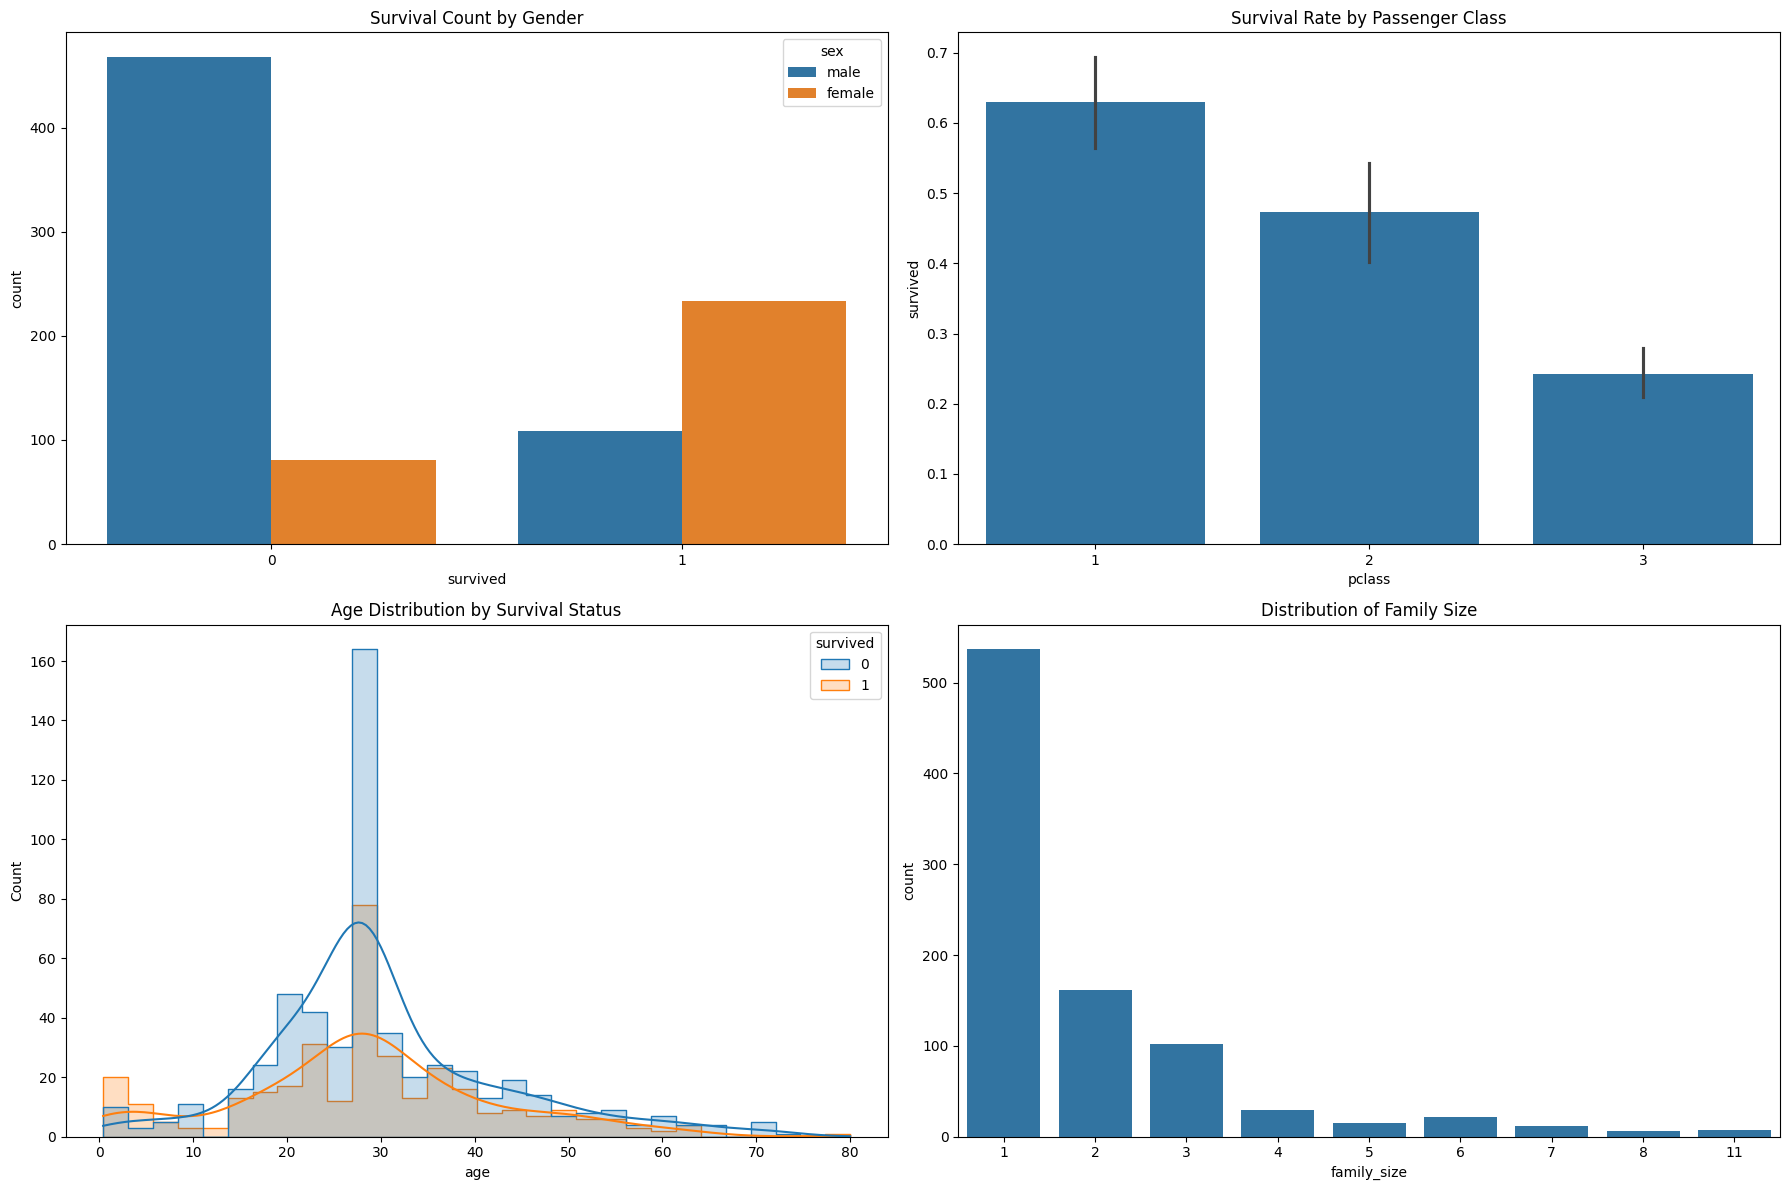


Cleaned dataset saved as 'cleaned_titanic_dataset.csv'.


In [ ]:
# Set up a figure with subplots
plt.figure(figsize=(18, 12))

# 1. Survival by gender
plt.subplot(2, 2, 1)
sns.countplot(x='survived', hue='sex', data=titanic)
plt.title("Survival Count by Gender")

# 2. Survival by passenger class
plt.subplot(2, 2, 2)
sns.barplot(x='pclass', y='survived', data=titanic)
plt.title("Survival Rate by Passenger Class")

# 3. Age distribution by survival
plt.subplot(2, 2, 3)
sns.histplot(data=titanic, x='age', hue='survived', kde=True, element="step")
plt.title("Age Distribution by Survival Status")

# 4. Family size distribution
plt.subplot(2, 2, 4)
sns.countplot(x='family_size', data=titanic)
plt.title("Distribution of Family Size")

plt.tight_layout()
plt.show()

# ----------------------------
# Save the Cleaned Dataset (optional)
# ----------------------------

# Save to CSV
titanic.to_csv("cleaned_titanic_dataset.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_titanic_dataset.csv'.")